# Read Directories

In [391]:
import os
for dirname, _, filenames in os.walk('sample_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

sample_data/UNSW_NB15_testing-set.csv
sample_data/UNSW_NB15_training-set.csv


# 1. Import Liberaries

In [392]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier,RidgeClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score)
from sklearn.metrics import average_precision_score

In [393]:
######## Base
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

pd.set_option('display.max_columns', None)

######### Warning ##############
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
########## Sklearn #############
# Pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve


# 2. Loading Data

In [394]:
train=pd.read_csv('sample_data/UNSW_NB15_training-set.csv')
test=pd.read_csv('sample_data/UNSW_NB15_testing-set.csv')


# 3. Data Visualization

Train data length: 82332
Test data length: 175341


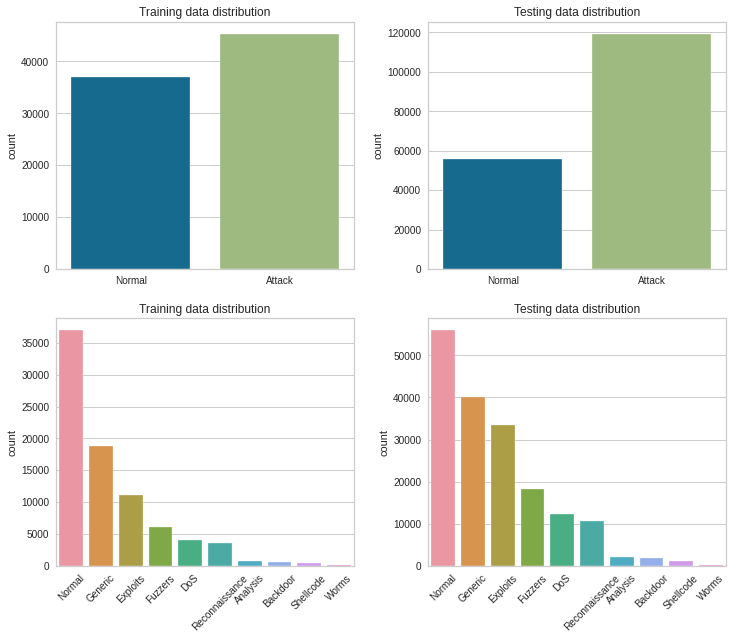

In [395]:
# Print the number of train / test samples
print(f"Train data length: {len(train)}")
print(f"Test data length: {len(test)}")

# Visualise the distribution of attacks and normal traffic

f, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create the plots
sns.countplot(x="label", data=train, ax=axes[0,0])
sns.countplot(x="label", data=test, ax=axes[0,1])
sns.countplot(x="attack_cat", data=train, ax=axes[1,0], order = train['attack_cat'].value_counts().index)
sns.countplot(x="attack_cat", data=test, ax=axes[1,1], order = test['attack_cat'].value_counts().index)
# Set the plot titles
axes[0,0].set_title("Training data distribution")
axes[1,0].set_title("Training data distribution")
axes[0,1].set_title("Testing data distribution")
axes[1,1].set_title("Testing data distribution")

# Rotate xticks for readability
axes[1,0].tick_params('x', labelrotation=45)
axes[1,1].tick_params('x', labelrotation=45)

# Change the xtick labels for attack / normal
axes[0,0].set_xticklabels(["Normal", "Attack"])
axes[0,1].set_xticklabels(["Normal", "Attack"])
# Remove xlabels
axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[1,0].set_xlabel("")
axes[1,1].set_xlabel("")

# Add some space between the plots for y labels
plt.subplots_adjust(wspace=0.25)

# 4. Dataset Observation

In [396]:
train.head()
#display the first  5 rows if we want to display n rows we insert n in head

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [397]:
train.shape,test.shape


((82332, 45), (175341, 45))

In [398]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

# 3. Data Preprocessing

Null Value check

In [399]:
train.isnull().sum()


id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

Categorical variables

In [400]:
mask = (train.dtypes == np.object)
print(train.loc[:,mask].head())
list_cat = train.loc[:,mask].columns.tolist()
print(list_cat)
print(train.loc[:,mask].values)


  proto service state attack_cat
0   udp       -   INT     Normal
1   udp       -   INT     Normal
2   udp       -   INT     Normal
3   udp       -   INT     Normal
4   udp       -   INT     Normal
['proto', 'service', 'state', 'attack_cat']
[['udp' '-' 'INT' 'Normal']
 ['udp' '-' 'INT' 'Normal']
 ['udp' '-' 'INT' 'Normal']
 ...
 ['arp' '-' 'INT' 'Normal']
 ['arp' '-' 'INT' 'Normal']
 ['udp' '-' 'INT' 'Normal']]


Numeric variables

In [401]:
mask = (train.dtypes != np.object)
print(train.loc[:,mask].head())
list_cat = train.loc[:,mask].columns.tolist()
print(list_cat)
train.loc[:,mask].describe()

   id       dur  spkts  dpkts  sbytes  dbytes         rate  sttl  dttl  \
0   1  0.000011      2      0     496       0   90909.0902   254     0   
1   2  0.000008      2      0    1762       0  125000.0003   254     0   
2   3  0.000005      2      0    1068       0  200000.0051   254     0   
3   4  0.000006      2      0     900       0  166666.6608   254     0   
4   5  0.000010      2      0    2126       0  100000.0025   254     0   

         sload  dload  sloss  dloss  sinpkt  dinpkt  sjit  djit  swin  stcpb  \
0  180363632.0    0.0      0      0   0.011     0.0   0.0   0.0     0      0   
1  881000000.0    0.0      0      0   0.008     0.0   0.0   0.0     0      0   
2  854400000.0    0.0      0      0   0.005     0.0   0.0   0.0     0      0   
3  600000000.0    0.0      0      0   0.006     0.0   0.0   0.0     0      0   
4  850400000.0    0.0      0      0   0.010     0.0   0.0   0.0     0      0   

   dtcpb  dwin  tcprtt  synack  ackdat  smean  dmean  trans_depth  \
0    

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.00000,8.233200e+04,8.233200e+04,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,4.753692,6.308556,755.394301,121.701284,6.363075e+03,535.180430,133.45908,1.084642e+09,1.073465e+09,128.28662,0.055925,0.029256,0.026669,139.528604,116.275069,0.094277,1.595372e+03,9.546604,1.369273,5.744923,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,64.649620,55.708021,6182.615732,1292.378499,5.672402e+04,3635.305383,127.35700,1.390860e+09,1.381996e+09,127.49137,0.116022,0.070854,0.055094,208.472063,244.600271,0.542922,3.806697e+04,11.090289,1.067188,8.418112,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,1.000000,0.000000,0.557929,0.010000,1.762392e+01,0.000000,255.00000,2.788886e+07,2.856975e+07,255.00000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,3.000000,2.000000,63.409444,63.136369,3.219332e+03,128.459914,255.00000,2.171310e+09,2.144205e+09,255.00000,0.105541,0.052596,0.048816,100.000000,87.000000,0.000000,0.000000e+00,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,5319.000000,5507.000000,60009.992000,57739.240000,1.483831e+06,463199.240100,255.00000,4.294950e+09,4.294881e+09,255.00000,3.821465,3.226788,2.928778,1504.000000,1500.000000,131.000000,5.242880e+06,63.000000,6.000000,59.000000,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


Evaluation of the training dataset

In [402]:
#  Check whether the positive label (1) match attack categories, and whether attack categories match labelled data.

# all(iterable) returns True if all elements of the iterable are considered as true values
print(all(((train.attack_cat != 'Attack') & (train.label == 1)) == (train.label == 1)))
print(all(((train.attack_cat != 'Normal') & (train.label == 1)) == (train.label == 1)))

True
True


number of occurrences for each attack category

In [403]:
train.attack_cat.value_counts()


Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

Which protocols and services appear in the positively labelled entries?

In [404]:
mask = (train.label == 1)
print(train.loc[mask,:].service.value_counts())
print(train.loc[mask,:].proto.value_counts())


-           19778
dns         18299
http         4274
smtp         1216
ftp           794
ftp-data      447
pop3          423
ssl            30
snmp           29
dhcp           26
radius          7
irc             5
ssh             4
Name: service, dtype: int64
udp           21321
tcp           15247
unas           3515
ospf            638
sctp            324
              ...  
wb-mon           32
br-sat-mon       32
pvp              32
wsn              32
ib               31
Name: proto, Length: 129, dtype: int64


In the negatively labelled ones?

In [405]:
mask = (train.label == 0)
print(train.loc[mask,:].service.value_counts())
print(train.loc[mask,:].proto.value_counts())


-           27375
http         4013
dns          3068
ftp-data      949
ftp           758
smtp          635
ssh           200
radius          2
Name: service, dtype: int64
tcp     27848
udp      8097
arp       987
ospf       38
igmp       30
Name: proto, dtype: int64


# 3.Data cleaning

In [406]:
print(train.columns.values)
print(test.columns.values)


['id' 'dur' 'proto' 'service' 'state' 'spkts' 'dpkts' 'sbytes' 'dbytes'
 'rate' 'sttl' 'dttl' 'sload' 'dload' 'sloss' 'dloss' 'sinpkt' 'dinpkt'
 'sjit' 'djit' 'swin' 'stcpb' 'dtcpb' 'dwin' 'tcprtt' 'synack' 'ackdat'
 'smean' 'dmean' 'trans_depth' 'response_body_len' 'ct_srv_src'
 'ct_state_ttl' 'ct_dst_ltm' 'ct_src_dport_ltm' 'ct_dst_sport_ltm'
 'ct_dst_src_ltm' 'is_ftp_login' 'ct_ftp_cmd' 'ct_flw_http_mthd'
 'ct_src_ltm' 'ct_srv_dst' 'is_sm_ips_ports' 'attack_cat' 'label']
['id' 'dur' 'proto' 'service' 'state' 'spkts' 'dpkts' 'sbytes' 'dbytes'
 'rate' 'sttl' 'dttl' 'sload' 'dload' 'sloss' 'dloss' 'sinpkt' 'dinpkt'
 'sjit' 'djit' 'swin' 'stcpb' 'dtcpb' 'dwin' 'tcprtt' 'synack' 'ackdat'
 'smean' 'dmean' 'trans_depth' 'response_body_len' 'ct_srv_src'
 'ct_state_ttl' 'ct_dst_ltm' 'ct_src_dport_ltm' 'ct_dst_sport_ltm'
 'ct_dst_src_ltm' 'is_ftp_login' 'ct_ftp_cmd' 'ct_flw_http_mthd'
 'ct_src_ltm' 'ct_srv_dst' 'is_sm_ips_ports' 'attack_cat' 'label']


In [407]:
df = pd.concat([train, test], ignore_index=True)

# Remove unwanted columns
df.drop(['id', 'attack_cat'], inplace=True, axis=1)

# Perform one-hot encoding on categorical columns and join back to main train_data
one_hot = pd.get_dummies(df[["proto", "state", "service"]])
df = df.join(one_hot)

# Remove the original categorical columns
df.drop(["proto", "state", "service"], inplace=True, axis=1)

# Re split the data back into train / test
train_data = df.iloc[0:175341, 0:]
test_data = df.iloc[175341:, 0:]
# Create y_train and then drop the label from the training data
y_train = np.array(train_data["label"])
train_data.drop(['label'], inplace=True, axis=1)

y_test = np.array(test_data["label"])
test_data.drop(['label'], inplace=True, axis=1)

# Use min-max scaler to scale the features to 0-1 range
# Only fit the scaler on the train data!!
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_data)

# Scale the testing data
X_test = scaler.transform(test_data)

# Ensure our dataset splits are still correct
print(f"Train data shape: {X_train.shape} Train label shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape} Test label shape: {y_test.shape}")

Train data shape: (175341, 196) Train label shape: (175341,)
Test data shape: (82332, 196) Test label shape: (82332,)


# 5. Machine Learning Analysis

In [408]:
# SGD Classifier
estimator=sgd = SGDClassifier(max_iter=1000000)
sgd_fit = sgd.fit(X_train, y_train)
y_pred_sgd = sgd_fit.predict(X_test)
sgd_accuracy = accuracy_score(y_test, y_pred_sgd)

In [409]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)


In [410]:
sgd_accuracy

0.9732181897682554

In [411]:
print ("Accuracy: " + str(accuracy_score(y_pred_sgd, y_test)))
print ("Precision: " + str(precision_score(y_pred_sgd, y_test)))
print ("Recall: " + str(recall_score(y_pred_sgd, y_test)))
print ("F1: " + str(f1_score(y_pred_sgd, y_test)))


Accuracy: 0.9732181897682554
Precision: 0.9871364581871084
Recall: 0.9847612985359644
F1: 0.9859474479163347


In [412]:
confusion_matrix(y_test, y_pred_sgd)


array([[ 2774,  1197],
       [ 1008, 77353]])

In [413]:
print(classification_report(y_test, y_pred_sgd))


              precision    recall  f1-score   support

           0       0.73      0.70      0.72      3971
           1       0.98      0.99      0.99     78361

    accuracy                           0.97     82332
   macro avg       0.86      0.84      0.85     82332
weighted avg       0.97      0.97      0.97     82332



**AUROC** **Score**

In [414]:
sgd_roc_auc_score = roc_auc_score(y_test, y_pred_sgd)


In [415]:
sgd_roc_auc_score


0.8428505257442718

In [416]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, y_pred_sgd)
roc_auc_sgd = auc(fpr_sgd, tpr_sgd)
precision_sgd, recall_sgd, th_sgd = precision_recall_curve(y_test, y_pred_sgd)

**AUPRC Score**

In [417]:
sgd_auprc_score = average_precision_score(y_test,y_pred_sgd)


In [418]:
sgd_auprc_score

0.9843368936453272

In [419]:
import numpy as np

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, scoring=None, obj_line=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    from sklearn.model_selection import learning_curve
    import numpy as np
    from matplotlib import pyplot as plt

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    if obj_line:
        plt.axhline(y=obj_line, color='blue')
    plt.legend(loc="best")
    return plt

In [420]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

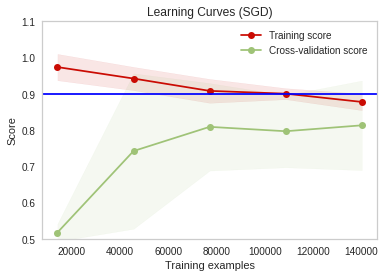

In [421]:
 X, y = X_train, y_train
plot_learning_curve(estimator = estimator,
                    title     = "Learning Curves (SGD)",
                    X         = X,
                    y         = y,
                    ylim      = (0.5, 1.1),
                    cv        = StratifiedKFold(),
                    scoring   = 'accuracy',     
                    obj_line  = 0.90,    
                    n_jobs    = -1)  
plt.show()


In [422]:
# Notebook setup
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
!pip install category_encoders
import category_encoders as ce

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier


from yellowbrick.classifier import ConfusionMatrix

import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [434]:
# Estimators dictionary
# We can add as more classifiers to our dictionary
# This is just a sample
estimators_dct={
                "SGD Classifier": SGDClassifier(),
               }

In [428]:
# set up the figure size for the confusion matrices
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 15

def confusion_matrices(X, y, estimator_dict):
    """
    Takes X, y datasets and an estimator dictionary -> returns confusion matrices of the classifiers
    """
    # Split the data as train and test
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=11)
    
    # Loop over the estimator_dict keys to get the each estimator 
    for estimator in estimator_dict.keys():
        print(estimator)
        
        # In the pipeline we use OneHotEncoder from Category Encoders
        model = Pipeline([('encoder', ce.OneHotEncoder()),
                          ('estimator', estimator_dict[estimator])])
        
        # Instantiate the classification model and visualizer
        model.fit(X_train, y_train)
        
        # The ConfusionMatrix visualizer takes a model
        cm = ConfusionMatrix(model, fontsize=13, cmap='YlOrBr')
        
        # To create the ConfusionMatrix, we need some test data
        # Score runs predict() on the data and then 
        # creates the confusion_matrix from scikit-learn
        cm.score(X_test, y_test)
        
        cm.poof()

SGD Classifier


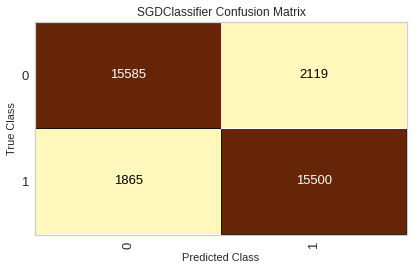

In [435]:
# Call the confusion_matrices function to get the confusion matrices
confusion_matrices(X, y, estimators_dct)


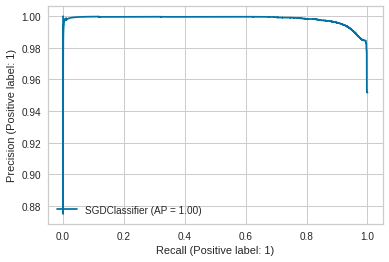

In [436]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(sgd, X_test, y_test)